![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [2]:
# Start coding here
# Use as many cells as you need
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  object        
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


In [3]:
crimes.describe().T

,count,mean,std,min,25%,50%,75%,max
DR_NO,247988.0,2.256571e+08,5.042345e+06,2203.0,2.210130e+08,222013125.0,2.310058e+08,239916487.0
Vict Age,247988.0,2.995476e+01,2.190102e+01,-2.0,0.000000e+00,31.0,4.500000e+01,99.0


In [4]:
crimes.isnull().sum()/len(crimes)*100  

DR_NO            0.000000
Date Rptd        0.000000
DATE OCC         0.000000
TIME OCC         0.000000
AREA NAME        0.000000
Crm Cd Desc      0.000000
Vict Age         0.000000
Vict Sex        13.003855
Vict Descent    13.004258
Weapon Desc     67.705292
Status Desc      0.000000
LOCATION         0.000000
dtype: float64

In [5]:
crimes['Vict Sex'].value_counts()/len(crimes) *100

M    40.739068
F    36.616288
X     9.628288
H     0.012097
-     0.000403
Name: Vict Sex, dtype: float64

In [6]:
crimes[crimes['Vict Sex'].isin(['H','-'])]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
1802,220511004,2022-07-05,2021-11-30,0530,Harbor,THEFT OF IDENTITY,27,H,H,NaN,Invest Cont,1400 W LOMITA BL
5004,220412589,2022-08-14,2022-08-13,2200,Hollenbeck,BURGLARY FROM VEHICLE,35,H,F,NaN,Invest Cont,100 S BOYLE AV
20424,222019605,2022-12-22,2022-12-20,0930,Olympic,THEFT OF IDENTITY,33,H,F,NaN,Invest Cont,1800 MENLO AV
25065,221114707,2022-10-04,2022-10-04,1720,Northeast,BATTERY - SIMPLE ASSAULT,51,H,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,FIGUEROA
38238,221819987,2022-11-01,2022-11-01,0105,Southeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),22,H,H,NaN,Invest Cont,200 E 97TH ST
46277,221112605,2022-08-09,2022-08-09,0830,Northeast,THEFT OF IDENTITY,58,H,F,NaN,Invest Cont,3500 MARMION WY
66176,221322137,2022-12-08,2022-12-05,0208,Newton,THEFT OF IDENTITY,27,H,F,NaN,Invest Cont,3400 HOOPER AV
70442,221917931,2022-12-13,2022-12-11,0500,Mission,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,58,H,F,NaN,Invest Cont,9200 WAKEFIELD AV
82174,220913349,2022-09-01,2022-08-30,2300,Van Nuys,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",47,H,O,NaN,Invest Cont,4700 N SEPULVEDA BL
86491,221918288,2022-12-23,2022-08-15,2000,Mission,THEFT PLAIN - PETTY ($950 & UNDER),51,H,F,NaN,Invest Cont,13800 GARBER ST


In [7]:
crimes['Vict Descent'].value_counts()/len(crimes) *100

H    30.384535
W    19.594900
B    14.237382
X    10.508170
O     7.869736
A     2.262206
K     0.563737
F     0.496798
C     0.487927
J     0.175008
V     0.132668
I     0.129845
Z     0.058471
P     0.033469
U     0.031050
D     0.008468
L     0.008065
S     0.006855
G     0.005645
-     0.000806
Name: Vict Descent, dtype: float64

In [8]:
new_vict_sex= crimes['Vict Sex'].isin(['H','-'])
new_vict_desc= crimes['Vict Descent'].isin(['-'])
new_crimes=new_crimes = crimes[~(new_vict_sex | new_vict_desc)]

print(new_crimes)

            DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0       221412410 2022-06-15 2020-11-12     1700      Pacific   
1       220314085 2022-07-22 2020-05-12     1110    Southwest   
2       222013040 2022-08-06 2020-06-04     1620      Olympic   
3       220614831 2022-08-18 2020-08-17     1200    Hollywood   
4       231207725 2023-02-27 2020-01-27     0635  77th Street   
...           ...        ...        ...      ...          ...   
247983  231510379 2023-05-29 2023-05-25     1100  N Hollywood   
247984  231604807 2023-01-27 2023-01-26     1800     Foothill   
247985  231606525 2023-03-22 2023-03-22     1000     Foothill   
247986  231210064 2023-04-12 2023-04-12     1630  77th Street   
247987  230906458 2023-03-05 2023-03-05     0900     Van Nuys   

                                              Crm Cd Desc  Vict Age Vict Sex  \
0         THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                       THEFT OF IDENTITY  

In [9]:
new_crimes.isnull().sum()/len(new_crimes)*100 

DR_NO            0.000000
Date Rptd        0.000000
DATE OCC         0.000000
TIME OCC         0.000000
AREA NAME        0.000000
Crm Cd Desc      0.000000
Vict Age         0.000000
Vict Sex        13.005533
Vict Descent    13.005937
Weapon Desc     67.703141
Status Desc      0.000000
LOCATION         0.000000
dtype: float64

In [10]:
new_crimes['Vict Sex'].fillna(new_crimes['Vict Sex'].mode()[0],inplace=True)
new_crimes['Vict Descent'].fillna(new_crimes['Vict Descent'].mode()[0],inplace=True)
new_crimes.drop(['Weapon Desc'], axis=1,inplace=True)

C:\Users\Maaz\AppData\Local\Temp\ipykernel_33964\1125924456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_crimes['Vict Sex'].fillna(new_crimes['Vict Sex'].mode()[0],inplace=True)
C:\Users\Maaz\AppData\Local\Temp\ipykernel_33964\1125924456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_crimes['Vict Descent'].fillna(new_crimes['Vict Descent'].mode()[0],inplace=True)
C:\Users\Maaz\AppData\Local\Temp\ipykernel_33964\1125924456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [11]:
new_crimes.isnull().sum()/len(new_crimes)*100 

DR_NO           0.0
Date Rptd       0.0
DATE OCC        0.0
TIME OCC        0.0
AREA NAME       0.0
Crm Cd Desc     0.0
Vict Age        0.0
Vict Sex        0.0
Vict Descent    0.0
Status Desc     0.0
LOCATION        0.0
dtype: float64

In [12]:
new_crimes.duplicated().sum()

0

In [13]:
new_crimes.describe().T

,count,mean,std,min,25%,50%,75%,max
DR_NO,247956.0,2.256571e+08,5.042371e+06,2203.0,221013011.5,222013125.0,2.310059e+08,239916487.0
Vict Age,247956.0,2.995399e+01,2.190178e+01,-2.0,0.0,31.0,4.500000e+01,99.0


In [14]:
cat_cols=new_crimes.select_dtypes(include=['object']).columns
num_cols = new_crimes.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['TIME OCC', 'AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent',
       'Status Desc', 'LOCATION'],
      dtype='object')
Numerical Variables:
['DR_NO', 'Vict Age']


DR_NO
Skew : -0.2


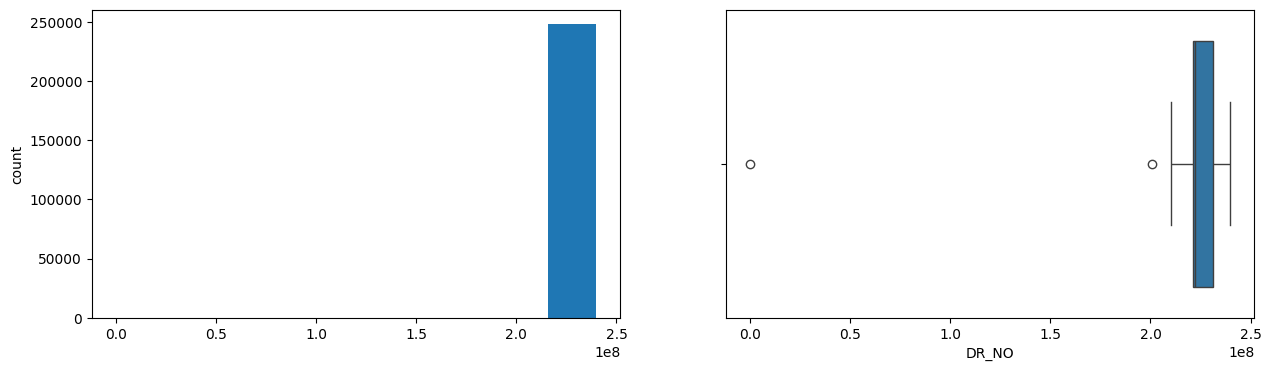

Vict Age
Skew : 0.12


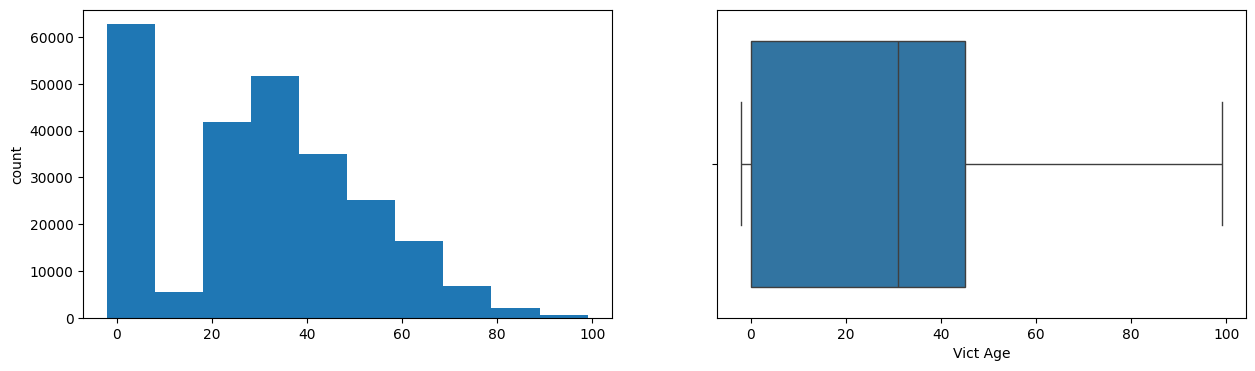

In [68]:
for col in num_cols:
    print(col)
    print('Skew :', round(new_crimes[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    new_crimes[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=new_crimes[col])
    plt.show()


In [15]:
for x in new_crimes.index:
    if new_crimes.loc[x,'Vict Age'] < 0:
        new_crimes.loc[x,'Vict Age'] = 0

In [16]:
new_crimes['LOCATION'].value_counts()/len(crimes) *100

10200    SANTA MONICA                 BL    0.260900
100    THE GROVE                    DR      0.206462
400 S  LA BREA                      AV      0.198800
700 S  FIGUEROA                     ST      0.193155
600 S  BROADWAY                             0.180654
                                              ...   
E  EDGEWARE                     RD          0.000403
11100    SARDIS                       AV    0.000403
7100    ROCK RIDGE                   TR     0.000403
19300    VISTA GRANDE                 WY    0.000403
1000    MILWAUKEE                    AV     0.000403
Name: LOCATION, Length: 43665, dtype: float64

In [17]:
cat_cols=cat_cols[:-1]
print(cat_cols)
num_cols=num_cols[1:3]
print(num_cols)

Index(['TIME OCC', 'AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent',
       'Status Desc'],
      dtype='object')
['Vict Age']


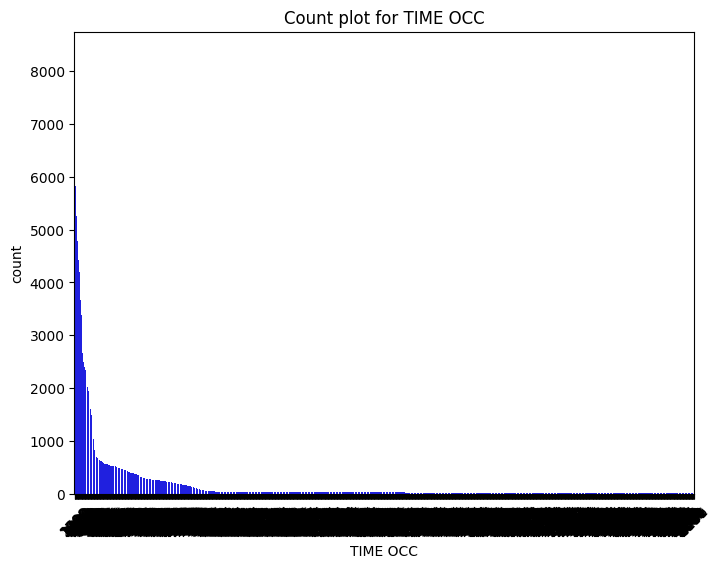

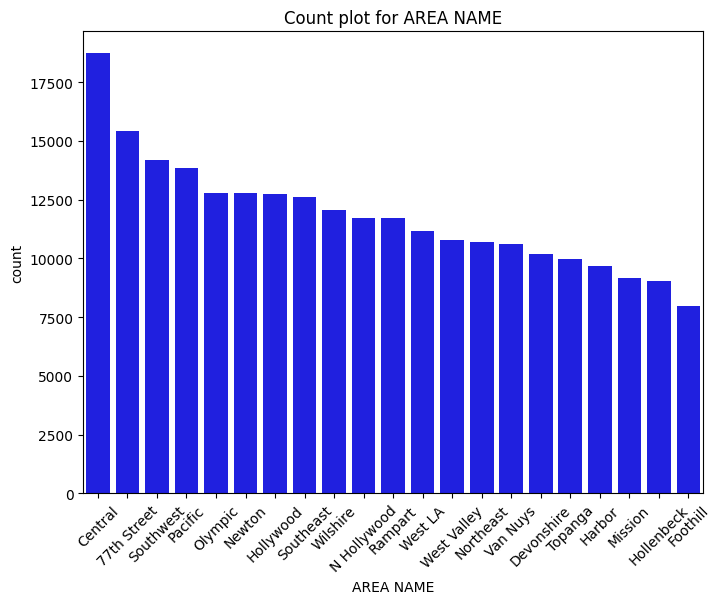

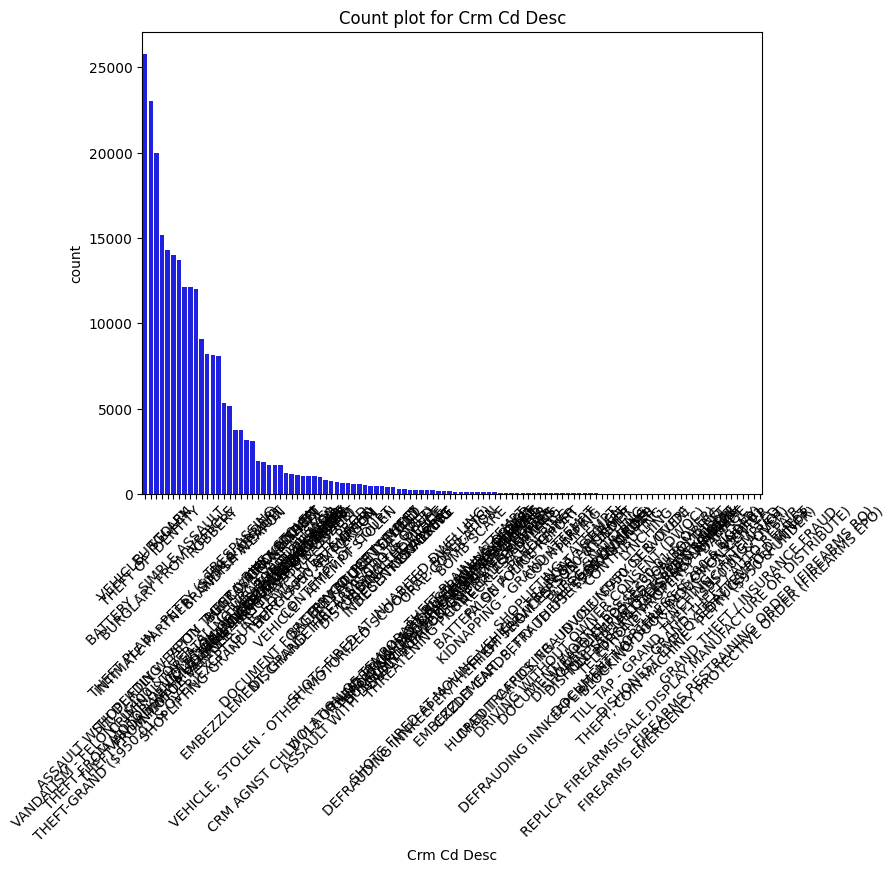

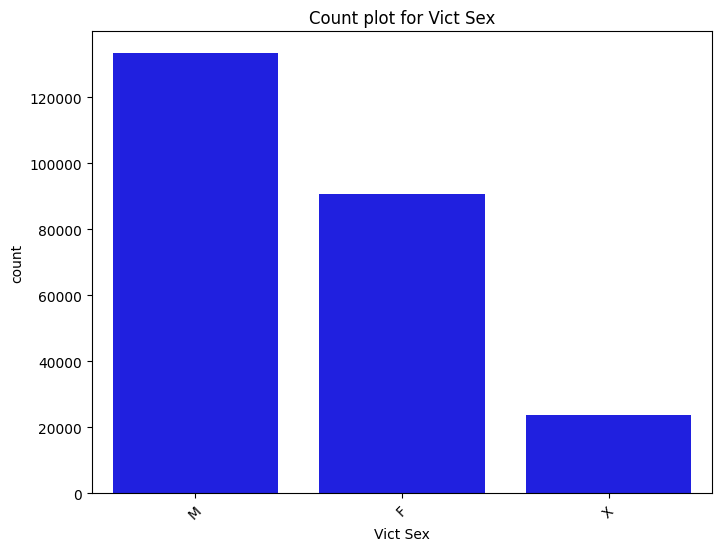

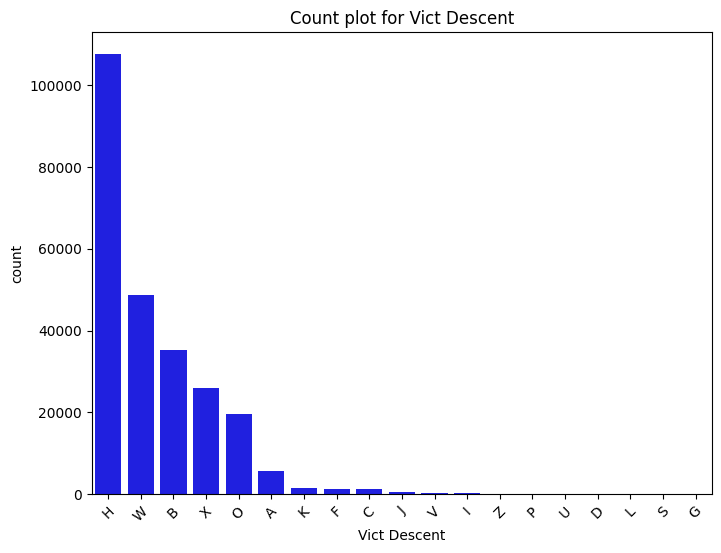

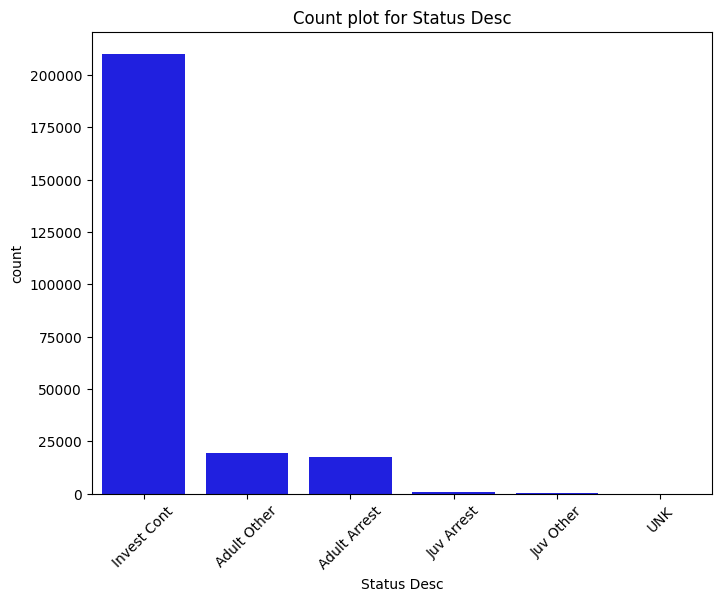

In [73]:
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(x=col, data=new_crimes, color='blue', order=new_crimes[col].value_counts().index)
    ax.set_title(f'Count plot for {col}')
    plt.xticks(rotation=45)
    plt.show()

## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour


In [18]:
new_crimes["HOUR OCC"] = new_crimes["TIME OCC"].str[:2].astype(int)


C:\Users\Maaz\AppData\Local\Temp\ipykernel_33964\1361833420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_crimes["HOUR OCC"] = new_crimes["TIME OCC"].str[:2].astype(int)


In [19]:
new_crimes.sample(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status Desc,LOCATION,HOUR OCC
152172,230111549,2023-05-01,2023-04-30,2330,Central,ROBBERY,76,M,B,Invest Cont,200 N HILL ST,23
80120,221917131,2022-11-21,2022-11-21,1750,Mission,VEHICLE - STOLEN,0,M,H,Invest Cont,12600 SAN FERNANDO RD,17
231713,230704475,2023-01-12,2023-01-11,1830,Wilshire,VEHICLE - STOLEN,0,M,H,Invest Cont,7200 MELROSE AV,18
157792,231507380,2023-03-21,2023-03-20,1455,N Hollywood,THEFT OF IDENTITY,25,F,W,Invest Cont,10900 HORTENSE ST,14
174749,231308654,2023-04-02,2023-04-02,1150,Newton,KIDNAPPING,31,F,H,Invest Cont,32ND ST,11
154149,231007927,2023-04-13,2023-04-12,2300,West Valley,VEHICLE - STOLEN,0,M,H,Invest Cont,7000 AMIGO AV,23
8374,221913204,2022-08-13,2022-08-01,0856,Mission,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,F,H,Invest Cont,7800 VAN NUYS BL,8
120270,220913894,2022-09-16,2022-09-15,2110,Van Nuys,INTIMATE PARTNER - SIMPLE ASSAULT,21,F,H,Adult Other,14300 FRIAR ST,21
124088,220118098,2022-08-10,2022-08-04,1301,Central,SHOPLIFTING - PETTY THEFT ($950 & UNDER),24,M,H,Invest Cont,600 S BROADWAY,13
215391,230111501,2023-04-29,2023-04-29,1450,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",17,M,H,Invest Cont,MAIN ST,14


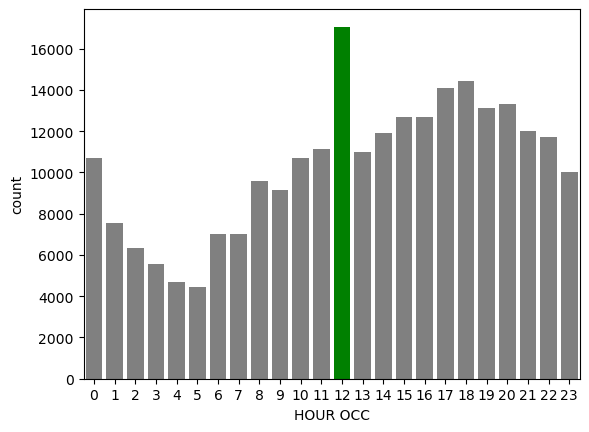

In [23]:
# Produce a countplot to find the largest frequency of crimes by hour
ax=sns.countplot(data=new_crimes, x="HOUR OCC", color='gray')
patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('green')
plt.show()

## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 

In [24]:
night_time = new_crimes[new_crimes["HOUR OCC"].isin([22,23,0,1,2,3])]


In [25]:
night_time.groupby('AREA NAME',as_index=False)['HOUR OCC'].count().sort_values('HOUR OCC',ascending=False)


,AREA NAME,HOUR OCC
1,Central,4091
0,77th Street,3361
6,Hollywood,3299
9,Newton,2925
14,Southeast,2883
11,Olympic,2850
15,Southwest,2787
12,Pacific,2773
8,N Hollywood,2597
13,Rampart,2480


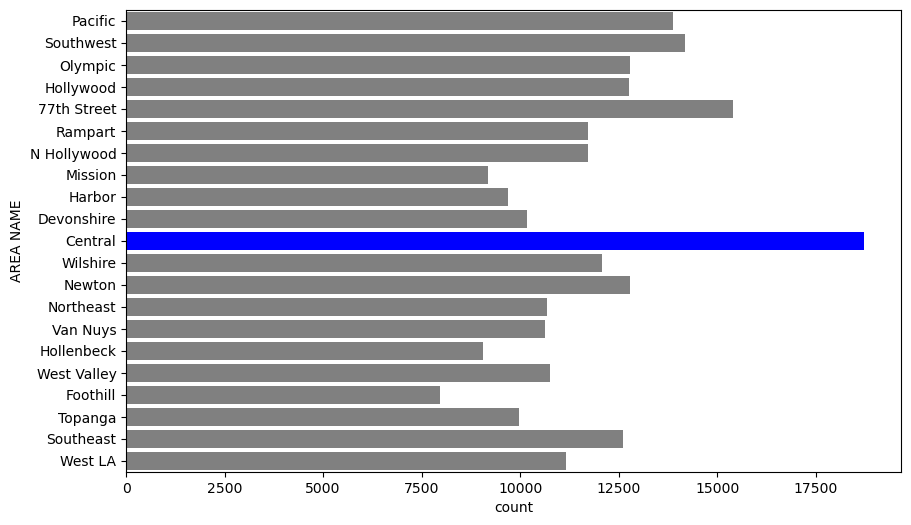

In [51]:
# Produce a countplot to find the largest frequency of crimes by AREA NAME
plt.figure(figsize=(10, 6))

# Create the countplot
ax = sns.countplot(data=new_crimes, y="AREA NAME", color='gray')

# Count the occurrences of each category in the 'AREA NAME' column
counts = new_crimes['AREA NAME'].value_counts()

# Get the category with the highest count
tallest_category = counts.idxmax()

# Set the color of the tallest bar to green
for patch in ax.patches:
    if patch.get_width() == counts[tallest_category]:
        patch.set_facecolor('blue')

plt.show()

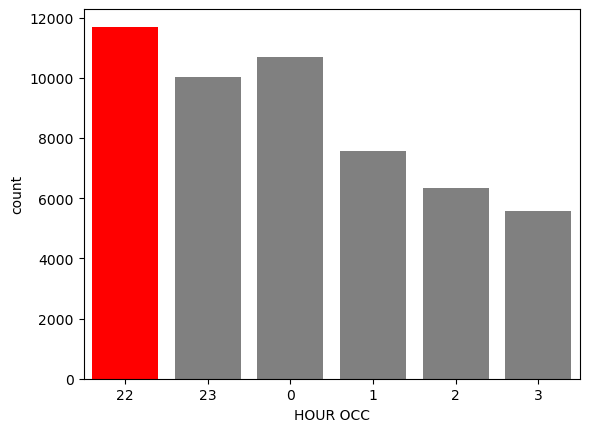

In [52]:
# Produce a countplot to find the largest frequency of crimes by hour between 10pm to 4am
ax=sns.countplot(data=night_time, x="HOUR OCC", color='gray', order=[22,23,0,1,2,3])
patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('red')
plt.show()

## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 

In [53]:
ranges = [-np.inf, 18, 26, 35, 45, 55, 65, np.inf]
group_names = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

# Create 'age_group' column
new_crimes['age_group'] = pd.cut(new_crimes['Vict Age'], bins=ranges, labels=group_names, right=False)


new_crimes[['age_group', 'Vict Age']]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_33964\2639908013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_crimes['age_group'] = pd.cut(new_crimes['Vict Age'], bins=ranges, labels=group_names, right=False)


,age_group,Vict Age
0,0-17,0
1,26-34,27
2,55-64,60
3,26-34,28
4,35-44,37
...,...,...
247983,18-25,25
247984,18-25,23
247985,18-25,25
247986,26-34,29


In [54]:
new_crimes.groupby('age_group')['Vict Age'].count().sort_values(ascending=False)

age_group
0-17     66800
26-34    47460
35-44    42150
45-54    28348
18-25    28286
55-64    20165
65+      14747
Name: Vict Age, dtype: int64

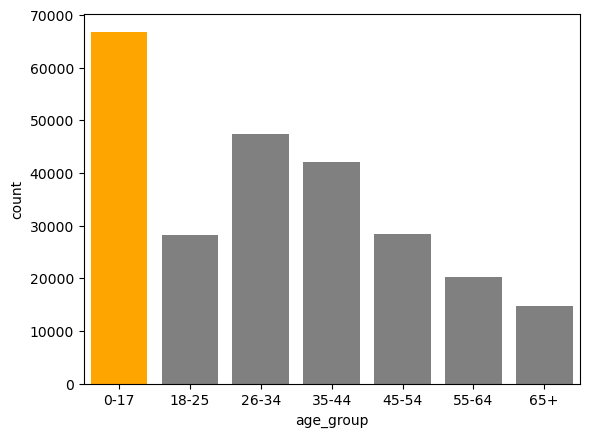

In [56]:
# Produce a countplot to find the largest frequency of crimes by age group
ax=sns.countplot(data=new_crimes, x="age_group", color='gray')
patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('orange')
plt.show()